# Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
%time data = pd.read_csv("./restaurant-1-orders.csv", delimiter=",")

Wall time: 776 ms


In [3]:
data.sample(5)

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
15638,15930,23/07/2019 18:30,Peshwari Naan,2,2.95,14
66758,13316,08/02/2019 19:08,Lamb Mysore,1,9.95,6
35799,7056,13/10/2017 18:58,Mushroom Rice,1,3.95,4
27746,4112,28/12/2016 19:44,Kulcha Naan,1,2.95,4
63672,4404,28/01/2017 16:51,Chicken Tikka Masala,1,8.95,7


In [4]:
data.describe()

,Order Number,Quantity,Product Price,Total products
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,9115.638162,1.243564,5.286492,6.931434
std,4052.210452,0.798207,3.338221,3.954832
min,630.000000,1.000000,0.500000,1.000000
25%,5590.000000,1.000000,2.950000,5.000000
50%,9103.000000,1.000000,3.950000,6.000000
75%,12630.000000,1.000000,8.950000,8.000000
max,16118.000000,51.000000,17.950000,60.000000


In [5]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()) \
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x*100)

missing_data.loc[missing_data['Missing Percent'] > 10] [:10]

,Total,Missing Percent


In [6]:
total

Total products    0
Product Price     0
Quantity          0
Item Name         0
Order Date        0
Order Number      0
dtype: int64

In [7]:
missing_data

,Total,Missing Percent
Total products,0,0.0
Product Price,0,0.0
Quantity,0,0.0
Item Name,0,0.0
Order Date,0,0.0
Order Number,0,0.0


In [8]:
missing_data.loc[missing_data['Missing Percent'] > 10] [:10]

,Total,Missing Percent


In [9]:
import pandas_profiling

In [10]:
data_resto = pd.read_csv('./restaurant.csv')
profile = data_resto.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="resto_pandas_profiling.html")

### Seaborn

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [12]:
import seaborn as sns

In [13]:
restaurant = pd.read_csv('./restaurant-1-orders.csv', delimiter=',')

In [14]:
restaurant.shape

(74818, 6)

In [15]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
Order Number      74818 non-null int64
Order Date        74818 non-null object
Item Name         74818 non-null object
Quantity          74818 non-null int64
Product Price     74818 non-null float64
Total products    74818 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


### Menganalisis Variabel Secara Individual

In [16]:
numerical_vars = ['Order Number','Order Date','Quantity','Product Price','Total products']
categorical_vars = ['Item Name']

In [17]:
restaurant = restaurant[numerical_vars+categorical_vars]

In [18]:
restaurant.shape

(74818, 6)

### Memahami Variabel Utama

In [19]:
restaurant['Item Name'].describe()

count          74818
unique           248
top       Pilau Rice
freq            4721
Name: Item Name, dtype: object

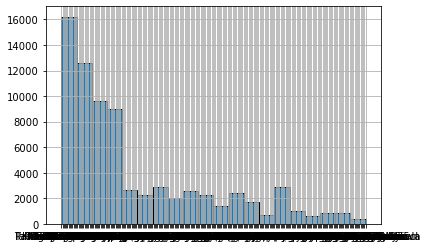

In [20]:
restaurant['Item Name'].hist(edgecolor='black',bins=20);

### Variabel Numerikal

In [21]:
restaurant[numerical_vars].describe()

,Order Number,Quantity,Product Price,Total products
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,9115.638162,1.243564,5.286492,6.931434
std,4052.210452,0.798207,3.338221,3.954832
min,630.000000,1.000000,0.500000,1.000000
25%,5590.000000,1.000000,2.950000,5.000000
50%,9103.000000,1.000000,3.950000,6.000000
75%,12630.000000,1.000000,8.950000,8.000000
max,16118.000000,51.000000,17.950000,60.000000


C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_ma

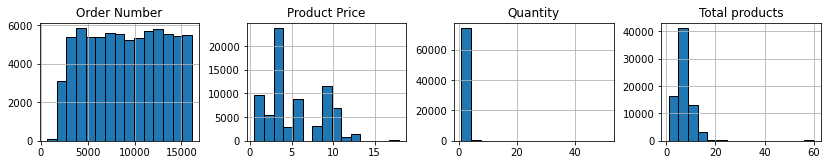

In [22]:
restaurant[numerical_vars].hist(edgecolor='black',bins=15, figsize=(14,5), layout=(2,4));

### Variabel Kategorikal

<AxesSubplot:title={'center':'Order Name'}>

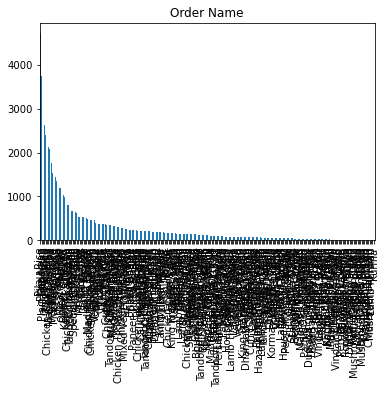

In [23]:
restaurant['Item Name'].value_counts().plot(kind='bar', title='Order Name')

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_ma

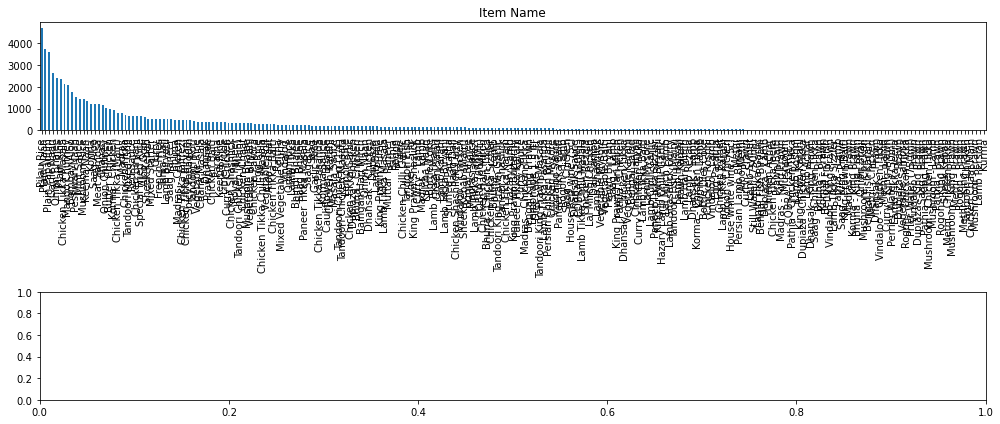

In [24]:
fig, ax = plt.subplots(2,1, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    restaurant[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

In [25]:
def identify_cat_above50(series):
    counts = series.value_counts()
    return list(counts[counts>=50].index)

In [26]:
levels_to_keep = restaurant[categorical_vars].apply(identify_cat_above50, axis=0)
levels_to_keep

Item Name    [Pilau Rice, Plain Naan, Plain Papadum, Garlic...
dtype: object

In [27]:
for var in categorical_vars:
    restaurant = restaurant.loc[restaurant[var].isin(levels_to_keep[var])]

In [28]:
restaurant.shape

(73404, 6)

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_ma

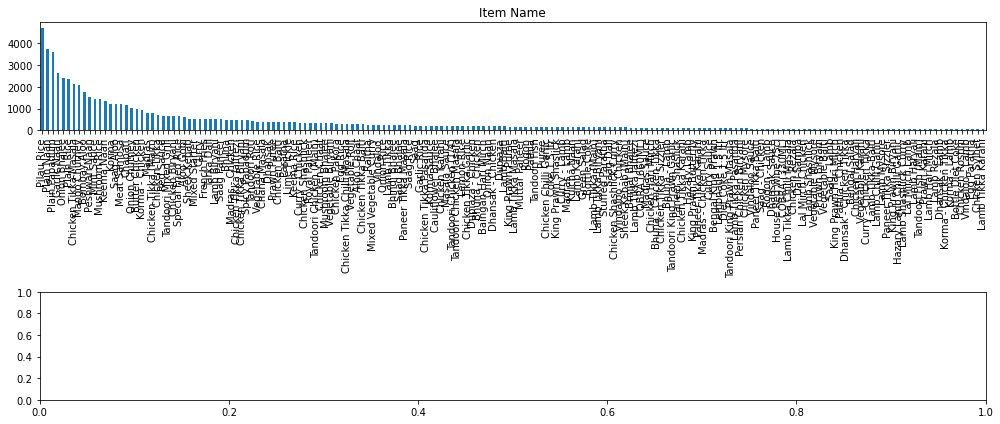

In [29]:
fig, ax = plt.subplots(2,1, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    restaurant[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

## Hubungan antar Variabel dengan Scatter Plot

<AxesSubplot:xlabel='Total products', ylabel='Product Price'>

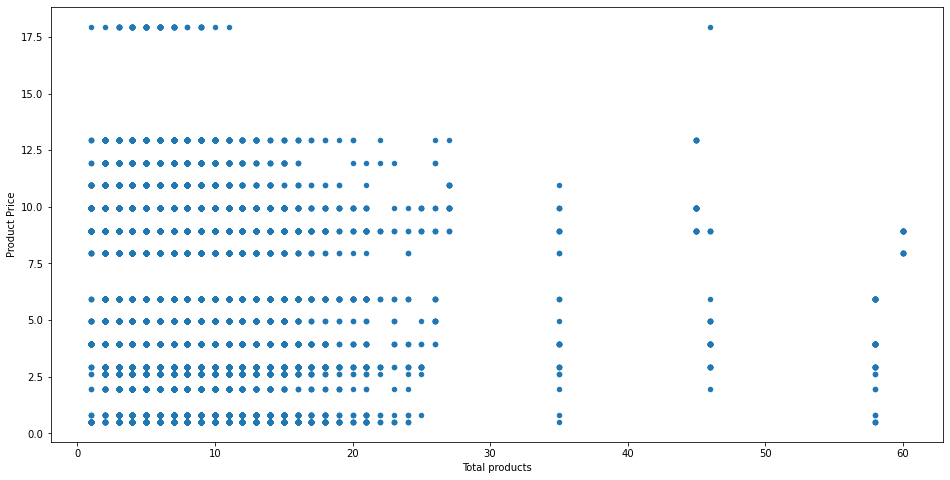

In [30]:
restaurant.plot.scatter(figsize=(16,8), x='Total products', y='Product Price')

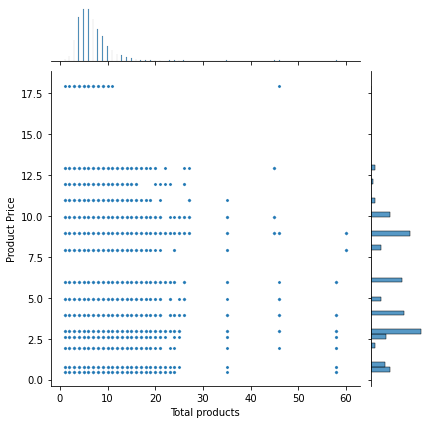

In [31]:
sns.jointplot(x='Total products', y='Product Price', data=restaurant, joint_kws={"s": 10});

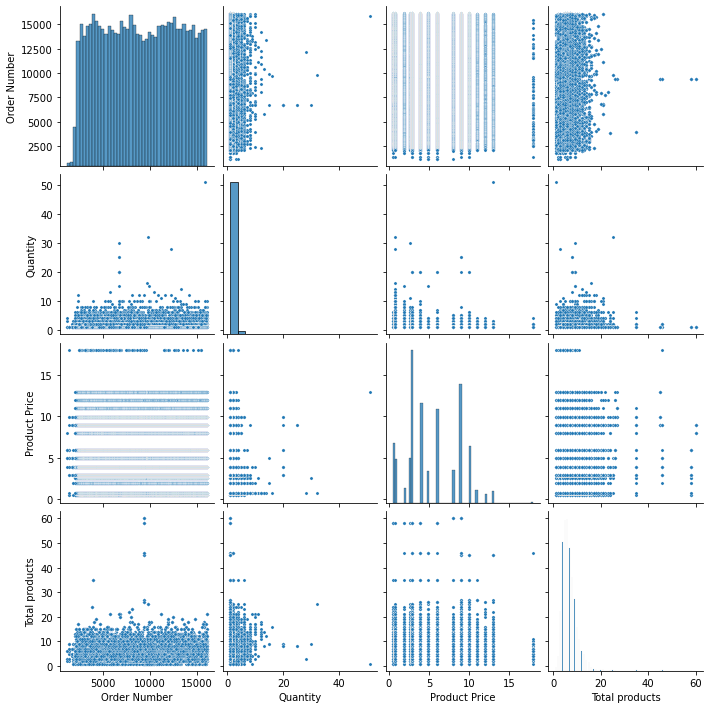

In [32]:
sns.pairplot(restaurant[numerical_vars[:5]],plot_kws={"s":10});

In [33]:
restaurant[numerical_vars].corr()

,Order Number,Quantity,Product Price,Total products
Order Number,1.000000,0.000145,-0.013733,-0.035920
Quantity,0.000145,1.000000,-0.226458,0.073138
Product Price,-0.013733,-0.226458,1.000000,-0.100285
Total products,-0.035920,0.073138,-0.100285,1.000000


In [34]:
restaurant[numerical_vars].corr()['Product Price'].sort_values(ascending=False)

Product Price     1.000000
Order Number     -0.013733
Total products   -0.100285
Quantity         -0.226458
Name: Product Price, dtype: float64

In [35]:
correlations = restaurant[numerical_vars].corr()

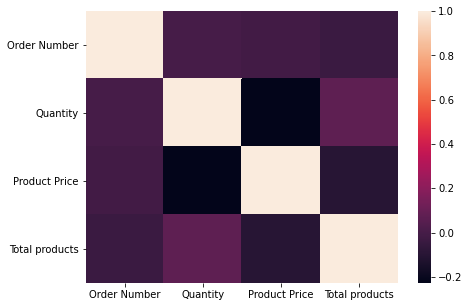

In [36]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax=ax);

## Hubungan Antara Variabel dengan Bloxpot

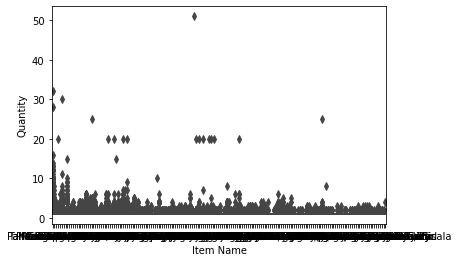

In [37]:
sns.boxplot(x='Item Name', y='Quantity', data=restaurant);

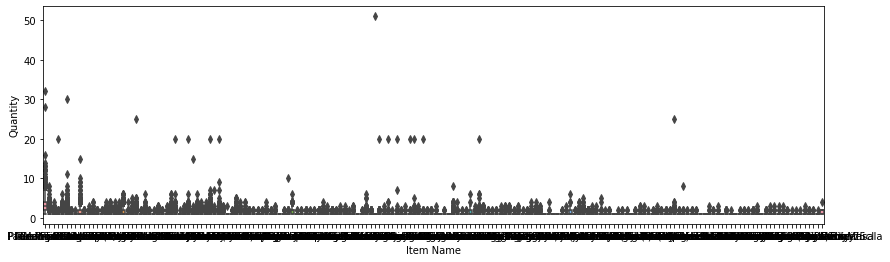

In [38]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Item Name', y='Quantity', data=restaurant, ax=ax);

In [40]:
sorted_nb = restaurant.groupby('Item Name')['Quantity'].median().sort_values().index.values

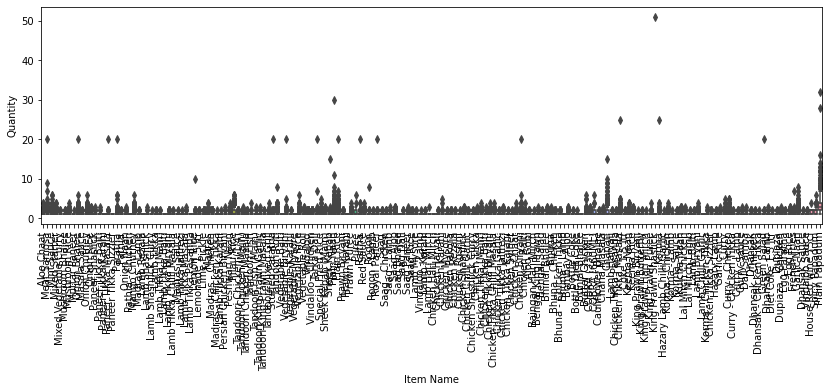

In [41]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Item Name', y='Quantity', data=restaurant, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

# Association Analysis

In [39]:
import os 
import sys
import pandas as pd

In [40]:
ratings = pd.read_csv("./restaurant-1-orders.csv", delimiter=",")

In [41]:
ratings[:10]

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6
5,16118,03/08/2019 20:25,Mango Chutney,1,0.50,6
6,16117,03/08/2019 20:17,Plain Naan,1,2.60,7
7,16117,03/08/2019 20:17,Mushroom Rice,1,3.95,7
8,16117,03/08/2019 20:17,Tandoori Chicken (1/4),1,4.95,7
9,16117,03/08/2019 20:17,Vindaloo - Lamb,1,7.95,7


## Data Preprocessing

In [42]:
ratings["Favorite"] = ratings["Total products"] > 5

In [43]:
ratings[10:20]

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,Favorite
10,16117,03/08/2019 20:17,Chapati,1,1.95,7,True
11,16117,03/08/2019 20:17,Lamb Tikka,1,4.95,7,True
12,16117,03/08/2019 20:17,Saag Paneer,1,5.95,7,True
13,16116,03/08/2019 20:09,Aloo Chaat,1,4.95,5,False
14,16116,03/08/2019 20:09,Chicken Pakora,1,5.95,5,False
15,16116,03/08/2019 20:09,Chicken Chilli Garlic,1,9.95,5,False
16,16116,03/08/2019 20:09,Lamb Biryani,1,9.95,5,False
17,16116,03/08/2019 20:09,Keema Naan,1,2.95,5,False
18,16115,03/08/2019 20:01,Chicken Pakora,1,5.95,7,True
19,16115,03/08/2019 20:01,Plain Papadum,1,0.80,7,True


# IMPLEMENTATION

In [44]:
pip install mlxtend


The following command must be run outside of the IPython shell:

    $ pip install mlxtend

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [45]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 10)

In [46]:
frequent_itemsets = {}

In [47]:
min_support = 0.03

In [48]:
metric = "lift"  # confident rule = 50%
min_threshold_for_metric = 1

In [49]:
asosiasi = (
    data.groupby([
        'Order Number', 'Item Name'
    ])['Quantity'].sum()  
    .unstack().reset_index()  # Transformasi
    .fillna(0)  # nilai null diisi 0
    .set_index('Order Number')  # men-set Order ID sebagai index
)

In [50]:
print("One order per row with the quantity of each product")
asosiasi.head()

One order per row with the quantity of each product


Item Name,Aloo Chaat,Aloo Gobi,Aloo Methi,Baingan Hari Mirch,Bengal Fish Biryani,...,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo Sauce
Order Number,,,,,,,,,,,
630,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
647,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
648,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
651,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [51]:
asosiasi_boolean_set = asosiasi.applymap(lambda quantity: 1 if int(quantity) >= 1 else 0)

print("Mengubah quantity kedalam  nilai boolean  ")
asosiasi_boolean_set.head()

Mengubah quantity kedalam  nilai boolean  


Item Name,Aloo Chaat,Aloo Gobi,Aloo Methi,Baingan Hari Mirch,Bengal Fish Biryani,...,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo Sauce
Order Number,,,,,,,,,,,
630,0,0,0,0,0,...,0,0,0,0,0
647,0,0,0,0,0,...,0,0,0,0,0
648,0,0,0,0,0,...,0,0,0,0,0
651,0,0,0,0,0,...,0,0,0,0,0
764,0,0,0,0,0,...,0,0,0,0,0


In [52]:
frequent_itemsets = apriori(asosiasi_boolean_set, min_support=min_support, use_colnames=True)

print("\nFrequent itemsets menggunakan apriori dan minimun support sebesar  %.2f persen" % (min_support*100))
frequent_itemsets.head(10)


Frequent itemsets menggunakan apriori dan minimun support sebesar  3.00 persen


,support,itemsets
0,0.045906,(Aloo Gobi)
1,0.034784,(Bhuna)
2,0.130776,(Bombay Aloo)
3,0.073151,(Butter Chicken)
4,0.087333,(Chapati)
5,0.048593,(Chicken Biryani)
6,0.051653,(Chicken Tikka)
7,0.060088,(Chicken Tikka (Main))
8,0.034635,(Chicken Tikka Biryani)
9,0.034784,(Chicken Tikka Jalfrezi)


In [53]:
keranjang = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
keranjang.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Chicken Tikka Masala),(Bombay Aloo),0.159215,0.130776,0.031126,0.195499,1.494922,0.010305,1.080452
1,(Bombay Aloo),(Chicken Tikka Masala),0.130776,0.159215,0.031126,0.238014,1.494922,0.010305,1.103413
2,(Bombay Aloo),(Mango Chutney),0.130776,0.154438,0.030380,0.232306,1.504206,0.010183,1.101432
3,(Mango Chutney),(Bombay Aloo),0.154438,0.130776,0.030380,0.196713,1.504206,0.010183,1.082085
4,(Onion Bhajee),(Bombay Aloo),0.179219,0.130776,0.030380,0.169513,1.296211,0.006942,1.046644
...,...,...,...,...,...,...,...,...,...
95,(Pilau Rice),(Saag Aloo),0.352392,0.089124,0.039039,0.110782,1.242999,0.007632,1.024355
96,(Plain Papadum),(Plain Naan),0.268418,0.280063,0.084795,0.315907,1.127985,0.009621,1.052396
97,(Plain Naan),(Plain Papadum),0.280063,0.268418,0.084795,0.302772,1.127985,0.009621,1.049272
98,(Plain Rice),(Plain Naan),0.176831,0.280063,0.068150,0.385395,1.376101,0.018626,1.171381


In [54]:
#dilakukan filter yang memiliki lift >= 3 dan confidence >= 0.8 
keranjang[(keranjang['lift'] >=3) &
       (keranjang['confidence'] >=0.8)]
#dilihat dari hasil rule nya ada kemungkinan kalau bombay aloo min sauce dan plain papadium akan dibeli secara bersamaan

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
120,"(Mint Sauce, Mango Chutney)",(Plain Papadum),0.053743,0.268418,0.046503,0.865278,3.223617,0.032077,5.430297
131,"(Onion Chutney, Mango Chutney)",(Plain Papadum),0.043666,0.268418,0.036799,0.842735,3.139633,0.025078,4.651905
149,"(Onion Chutney, Mint Sauce)",(Plain Papadum),0.035829,0.268418,0.031126,0.868750,3.236553,0.021509,5.573956
156,"(Pilau Rice, Mint Sauce)",(Plain Papadum),0.046428,0.268418,0.038367,0.826367,3.078652,0.025905,4.213369


In [82]:
# List Item
seluruh_item = list(data['Item Name'].unique())

# Tabel Asosisasi
associations = pd.DataFrame(index=seluruh_item, columns=seluruh_item)
associations.fillna(0, inplace=True)
associations.iloc[:5,:5]

,Plain Papadum,King Prawn Balti,Garlic Naan,Mushroom Rice,Paneer Tikka Masala
Plain Papadum,0,0,0,0,0
King Prawn Balti,0,0,0,0,0
Garlic Naan,0,0,0,0,0
Mushroom Rice,0,0,0,0,0
Paneer Tikka Masala,0,0,0,0,0


In [85]:
pesanan = data.groupby('Order Number')['Item Name'].apply(lambda x: ','.join(x)).reset_index()
pesanan.rename(columns={'Item Name': 'Order'}, inplace=True)
pesanan['Order'] = pesanan['Order'].str.split(',')
pesanan.head(20)

,Order Number,Order
0,630,[Onion Bhaji]
1,647,[Onion Bhaji]
2,648,[Onion Bhaji]
3,651,[Onion Bhaji]
4,764,[Onion Bhaji]
5,838,[Onion Bhaji]
6,840,[Onion Bhaji]
7,857,[Onion Bhaji]
8,874,[Onion Bhaji]
9,894,[Onion Bhaji]


In [86]:
# Popular la tabla
for pesanan in pesanan['Order']:
    associations.loc[pesanan, pesanan] += 1

In [87]:
associations.iloc[:4, :4]

,Plain Papadum,King Prawn Balti,Garlic Naan,Mushroom Rice
Plain Papadum,3596,4,712,495
King Prawn Balti,4,21,3,6
Garlic Naan,712,3,2628,367
Mushroom Rice,495,6,367,1452


In [88]:
associations_top = associations.loc[list(top_20.index), list(top_20.index)]

for i in range(associations_top.shape[0]):
    for j in range(i, associations_top.shape[0]):
        associations_top.iloc[i, j] = 0
        
associations_top.iloc[:5, :5]

,Butter Chicken,Korma - Chicken,Saag Aloo,Onion Chutney,Korma
Butter Chicken,0,0,0,0,0
Korma - Chicken,70,0,0,0,0
Saag Aloo,92,106,0,0,0
Onion Chutney,113,50,139,0,0
Korma,46,0,151,75,0


In [89]:
item_freq = data.groupby('Item Name').agg({'Quantity': 'sum'})
item_freq = item_freq.sort_values(by=['Quantity'])
top_20 = item_freq.tail(20)

<AxesSubplot:title={'center':'Common sold together items'}>

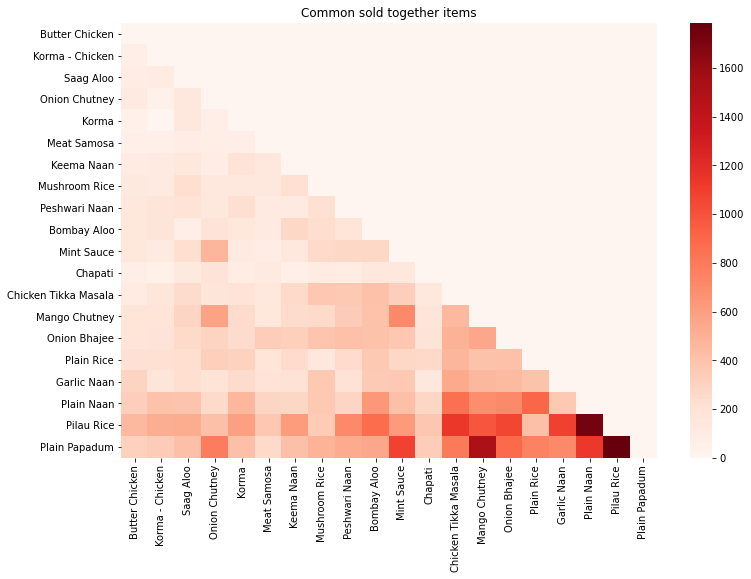

In [90]:
plt.figure(figsize=(12,8))
plt.title('Common sold together items')
sns.heatmap(associations_top, cmap="Reds", annot=False)

# Visualisasi Pasangan Data Menu dengan Bar Chart

In [55]:
number_keranjang_to_visualize = 3

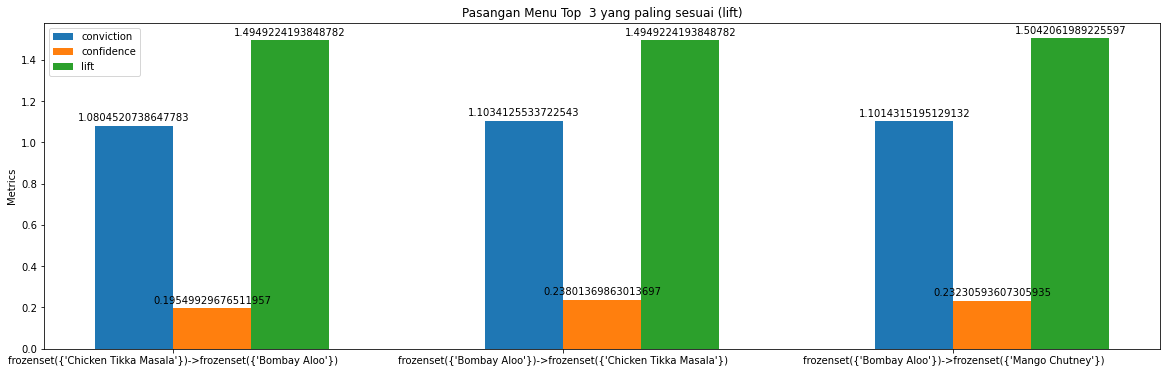

In [56]:
keranjang_top = keranjang.iloc[0:number_keranjang_to_visualize, :]
labels = ["->".join (map(str, keranjang)) for keranjang in keranjang_top.iloc[:, 0:2].values]  # berikan format teks {set1} -> {set2} untuk setiap label
x = np.arange(len(labels))  # lokasi labek
width = 0.2
fig, ax = plt.subplots(figsize=(20,6))
pasangan1 = ax.bar(x - width/2, keranjang_top['conviction'].values, width, label='conviction')
pasangan2 = ax.bar(x + width/2, keranjang_top['confidence'].values, width, label='confidence')
pasangan3 = ax.bar(x + width*1.5, keranjang_top['lift'].values, width, label='lift')
# Menambahkan teks untuk label, judul dan penamaan x-axis, dsb
ax.set_ylabel('Metrics')
ax.set_title('Pasangan Menu Top  ' + str(number_keranjang_to_visualize) + ' yang paling sesuai (' + metric +')')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



def autolabel(pasangan):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for pasangan in pasangan:
        height = pasangan.get_height()
        ax.annotate('{}'.format(height),
                    xy=(pasangan.get_x() + pasangan.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(pasangan1)
autolabel(pasangan2)
autolabel(pasangan3)

mng = plt.get_current_fig_manager()
# mng.window.state('zoomed')  # maximize the screen in windows
plt.show()